In [102]:
import pandas_profiling
import pandas as pd
import os
from sklearn.model_selection import train_test_split,ShuffleSplit
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
import requests
import json
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
#from sklearn import LinearRegression

In [3]:
os.chdir(r'E:/Machine_Hack')

In [74]:
df = pd.read_csv(r'train.csv').drop_duplicates()

Pre Processing

In [75]:
df.rename(columns = {'TARGET(PRICE_IN_LACS)':'TARGET'},inplace = True)
df = df.drop_duplicates().reset_index(drop = True)

# EDA

In [76]:
df.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LATITUDE              0
LONGITUDE             0
TARGET                0
dtype: int64

In [77]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LATITUDE,LONGITUDE,TARGET
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


array([[<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='RERA', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='BHK_NO.', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='SQUARE_FT', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='READY_TO_MOVE', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='RESALE', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='LATITUDE', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='LONGITUDE', ylabel='UNDER_CONSTRUCTION'>,
        <AxesSubplot:xlabel='TARGET', ylabel='UNDER_CONSTRUCTION'>],
       [<AxesSubplot:xlabel='UNDER_CONSTRUCTION', ylabel='RERA'>,
        <AxesSubplot:xlabel='RERA', ylabel='RERA'>,
        <AxesSubplot:xlabel='BHK_NO.', ylabel='RERA'>,
        <AxesSubplot:xlabel='SQUARE_FT', ylabel='RERA'>,
        <AxesSubplot:xlabel='READY_TO_MOVE', ylabel='RERA'>,
        <AxesSubplot:xlabel='RESALE', ylabel='RERA'>,
        <AxesSub

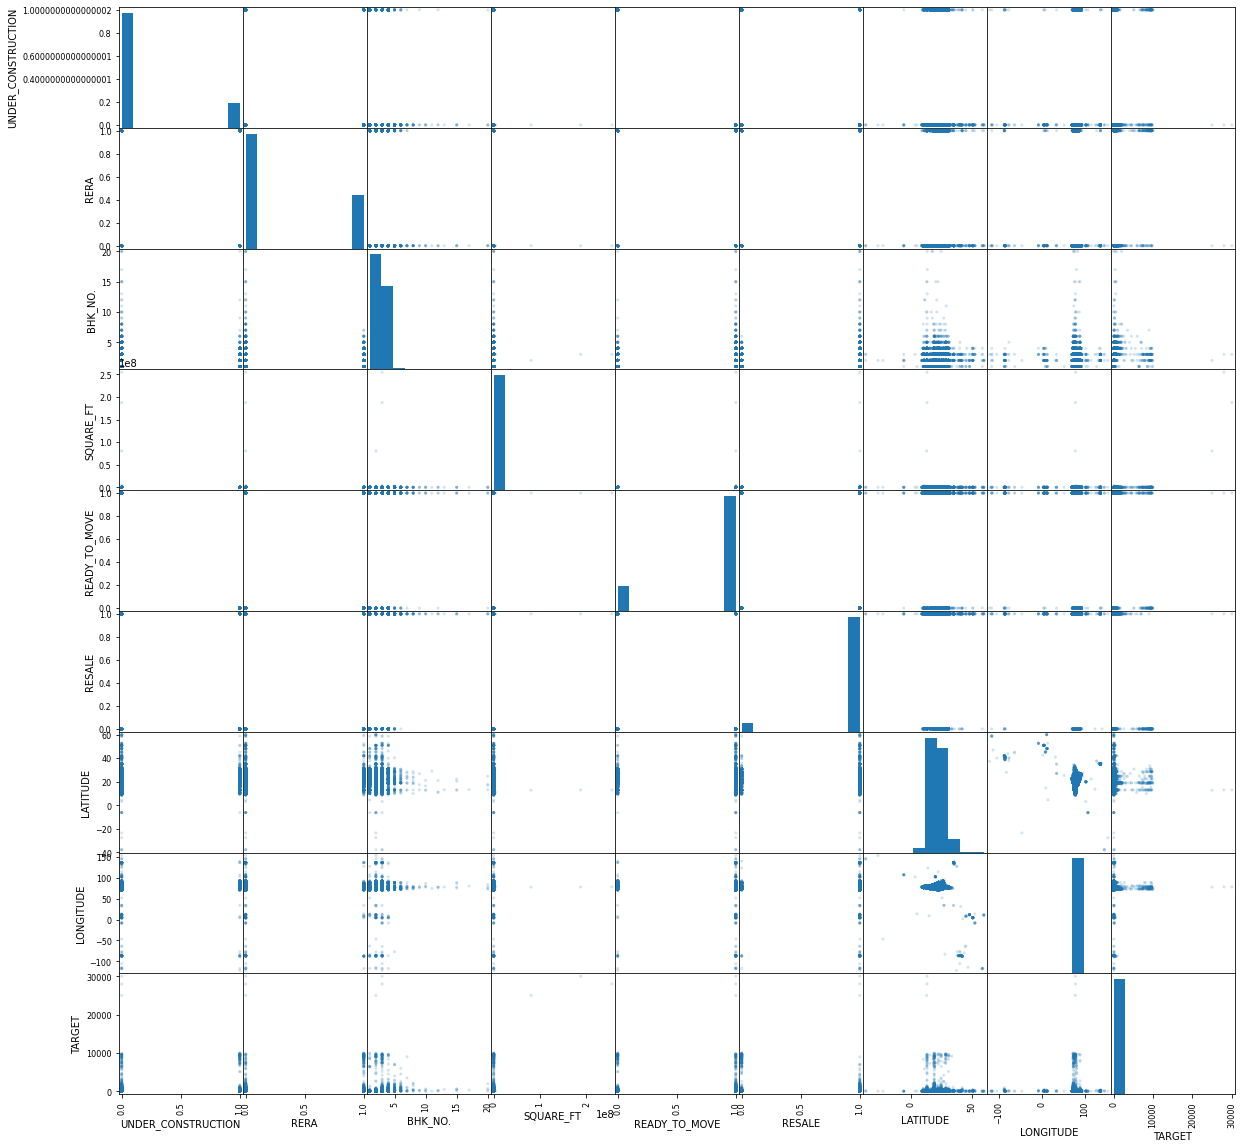

In [78]:
pd.plotting.scatter_matrix(df.select_dtypes(np.number),alpha = 0.2,figsize = (20,20),grid = False)

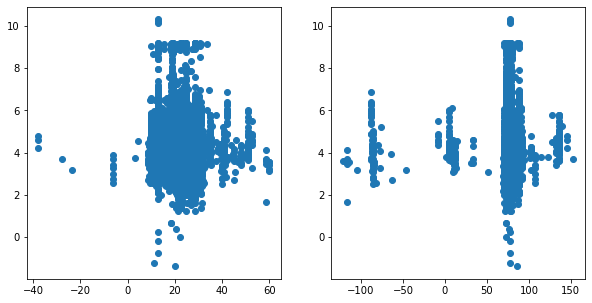

In [79]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(df['LATITUDE'],np.log(df['TARGET']))
axes[1].scatter(df['LONGITUDE'],np.log(df['TARGET']))

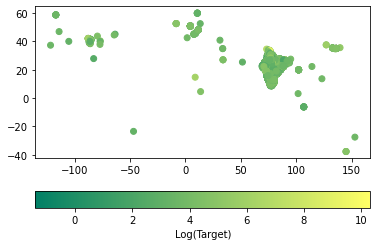

In [80]:
plt.scatter(df['LONGITUDE'],df['LATITUDE'],c = np.log(df['TARGET']),cmap="summer")
plt.colorbar(label="Log(Target)", orientation="horizontal")
plt.show()

(array([3.0000e+00, 6.0000e+00, 7.7000e+01, 3.4430e+03, 1.5964e+04,
        7.8220e+03, 1.3890e+03, 2.0000e+02, 1.0500e+02, 4.1000e+01]),
 array([-1.38629436, -0.21676966,  0.95275504,  2.12227975,  3.29180445,
         4.46132915,  5.63085385,  6.80037855,  7.96990326,  9.13942796,
        10.30895266]),
 <BarContainer object of 10 artists>)

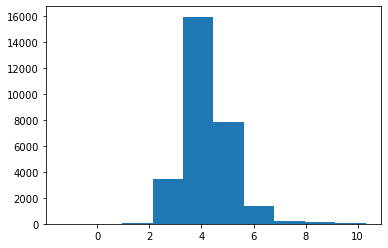

In [81]:
plt.hist(np.log(df['TARGET']))


In [82]:
df['LOG_TARGET'] = np.log(df['TARGET'])

In [83]:
def plot_grouped_hists(df,hist_col,group_col,i):
    df['combined'] = df[group_col].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
    
    bins = np.linspace(min(df['LOG_TARGET']),max(df['LOG_TARGET']))
    plt.figure(figsize=(16, 4)) 
    for item in df['combined'].unique():
        
        subset_df = df[df['combined'] == item]

        plt.subplot(1,2,i).hist(subset_df[hist_col],bins)
        
    plt.legend(df.combined.unique())
    plt.title(f"{'-'.join(group_col)} split")

<ipython-input-83-04451dcb2ac3>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,i).hist(subset_df[hist_col],bins)


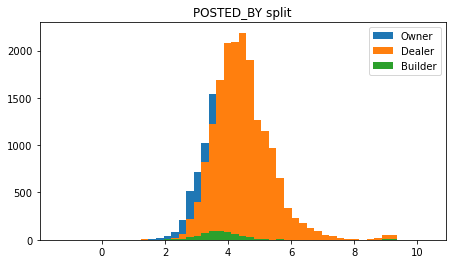

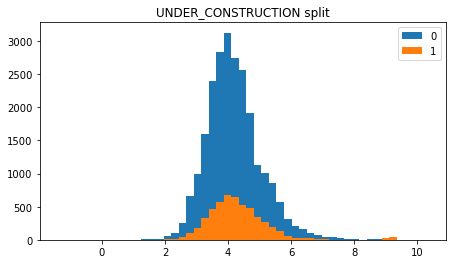

In [84]:
plot_grouped_hists(df,'LOG_TARGET',['POSTED_BY'],1)
plot_grouped_hists(df,'LOG_TARGET',['UNDER_CONSTRUCTION'],2)

<ipython-input-83-04451dcb2ac3>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,i).hist(subset_df[hist_col],bins)


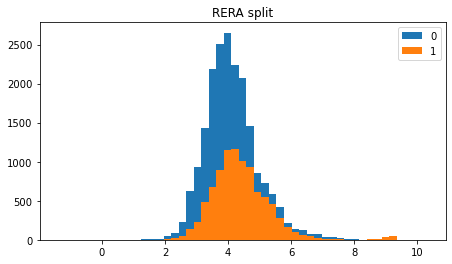

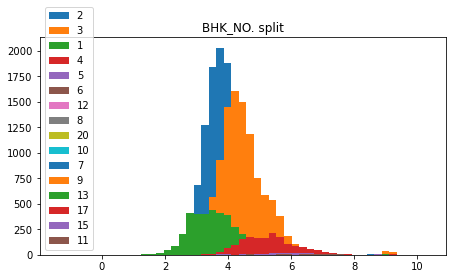

In [85]:
plot_grouped_hists(df,'LOG_TARGET',['RERA'],1)
plot_grouped_hists(df,'LOG_TARGET',['BHK_NO.'],2)

<ipython-input-83-04451dcb2ac3>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,i).hist(subset_df[hist_col],bins)


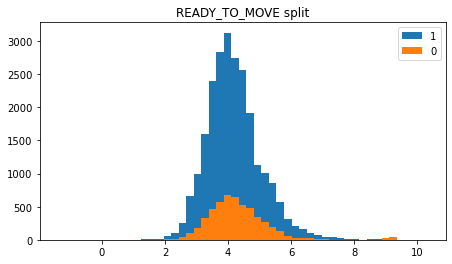

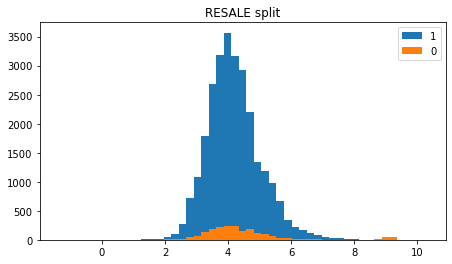

In [86]:
plot_grouped_hists(df,'LOG_TARGET',['READY_TO_MOVE'],1)
plot_grouped_hists(df,'LOG_TARGET',['RESALE'],2)

In [87]:
variables = ['POSTED_BY', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE','LONGITUDE','ADDRESS',
       'LATITUDE']
target = ['LOG_TARGET']
all_cols = variables + target


# Feature engineering

In [90]:

#### Extract City from address
def variable_transformation(df):
    df  = df.loc[:,df.columns != 'ADDRESS']
    cat_cols = [df.columns[i] for i,col in enumerate(df.dtypes) if col=='object']

    df.loc[:,'SQUARE_FT'] = np.log(df['SQUARE_FT'])
    df = pd.get_dummies(df,columns = cat_cols)
    return(df)

# Train Test split

In [91]:
df = df[all_cols].copy()
df = variable_transformation(df)

x = df.loc[:,df.columns!='LOG_TARGET']
y = df.loc[:,['LOG_TARGET']]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

C:\Users\rajko\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Model functions

In [92]:
def model_training(x_train,y_train,model_name,params):
    if model_name=='rf':
        model = RandomForestRegressor().set_params(**params)
    elif model_name == 'xgb':
        model = xgb.XGBRegressor(use_label_encoder = False).set_params(**params)
    
    return(model.fit(x_train,y_train))

In [97]:
def itergrid(model_name):
    if model_name == 'rf':
        return({'n_estimators' : [100,300,500,700,1000],
                'max_depth' : [5,7,9,11],
                'criterion' : ['mse','mae'],
                'max_features' : ['auto','sqrt','log2']})
    elif model_name =='xgb':
        return({'eta' : np.linspace(0,1,5),
                'gamma' : np.linspace(0,10,1) ,
                'max_depth' : [5,7,9,11],
                'sub_sample' : [0.1,0.2,0.5,0.8],
                'process_type' : ['default']})
    elif model_name == 'svm':
        return({'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']})
    
    

# Evaluation Function

In [98]:
def score_eval(exp,pred):
    return(np.sqrt(mean_squared_log_error(exp, pred)))

In [ ]:
cv_split = ShuffleSplit(5,test_size = 0.2,random_state = 0)
all_results = []
all_models = ['rf']
threshold_list = [0.3,0.4,0.5]
for model_name in all_models:

    for _ in range(100):
        current_params = {}
        grid = itergrid(model_name)
        for key in grid.keys():
            current_params[key] = random.choice(grid[key])
        for train_index,test_index in cv_split.split(x):
            print(len(x_test.index))
            x_train = x.loc[train_index]
            x_test = x.loc[test_index]
            y_train = y.loc[train_index]
            y_test = y.loc[test_index]
            model = model_training(x_train,y_train,model_name,current_params)
            
            
            prediction = np.exp(model.predict(x_test))
            
                
            all_results.append([model_name,str(json.dumps(current_params)),mean_absolute_error(y_test,prediction),mean_squared_error(y_test,prediction)])
        
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

5810


<ipython-input-92-00e3dd251531>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return(model.fit(x_train,y_train))


5810


<ipython-input-92-00e3dd251531>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return(model.fit(x_train,y_train))


5810


<ipython-input-92-00e3dd251531>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return(model.fit(x_train,y_train))


In [858]:
train_predictions = abs(model_output.predict(x_train))
# test_y['predicted'] = predictions

In [859]:
score_eval(y_train,train_predictions)

0.19553808630024908

In [860]:
test_predictions = abs(model_output.predict(x_test))
score_eval(y_test,test_predictions)

0.3245180372240009

# Reading Test dataset

In [861]:
model_output.feature_importances_

array([0.01246043, 0.09801709, 0.46223632, 0.01333398, 0.06530172,
       0.06922777, 0.12263559, 0.01191125, 0.0967085 , 0.04137611,
       0.00679123, 0.        ], dtype=float32)

In [862]:
test_df = pd.read_csv('Test.csv')
test_df = test_df[variables].copy()
test_df = variable_transformation(test_df)

Index(['POSTED_BY', 'RERA', 'BHK_NO.', 'BHK_OR_RK', 'SQUARE_FT',
       'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LATITUDE', 'LONGITUDE'],
      dtype='object')


In [863]:
predictions = model_output.predict(test_df)

In [864]:
df['predictions'] = model_output.predict(x)
df['diff'] = abs(df['predictions']-df['TARGET'])/df['TARGET']

In [867]:
pd.DataFrame(predictions,columns= ['TARGET(PRICE_IN_LACS)']).to_csv('Predictions_v6.csv',index=False)